# Part 1: Regression Task – Auto MPG Dataset

## Overview
In this notebook, we analyze the Auto MPG dataset to predict fuel efficiency (mpg)
based on vehicle characteristics. We explore three regression models: Linear Regression,
Polynomial Regression, and KNN Regression, and compare their performance.

**Dataset source:** https://archive.ics.uci.edu/dataset/9/auto+mpg  
**Target variable:** mpg (miles per gallon)  
**Features:** cylinders, displacement, horsepower, weight, acceleration, model_year, origin

In [67]:
# Installations and downloads of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# Global style settings
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = '#f8f9fa'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.4
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['font.size'] = 12
MAIN_COLOR = '#2c7bb6'
SECOND_COLOR = '#d7191c'

## 1.1 Exploratory Data Analysis (EDA)
We load the Auto MPG dataset directly from the UCI repository and examine
its structure, missing values, and basic statistics.

In [69]:
# Loading data directly from the Internet
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower',
                'weight', 'acceleration', 'model_year', 'origin', 'car_name']

df = pd.read_csv(url, names=column_names, sep=r'\s+', na_values='?')

# Display first 5 lines
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [70]:
# Dataset dimensions
print("Dataset shape:", df.shape)

# Missing values per column
print("\nMissing values per column:")
print(df.isnull().sum())

# Basic statistics
df.describe()

Dataset shape: (398, 9)

Missing values per column:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## 1.2 Visualizations
We visualize the distribution of the target variable (mpg) and its
relationships with each feature, followed by a correlation heatmap.

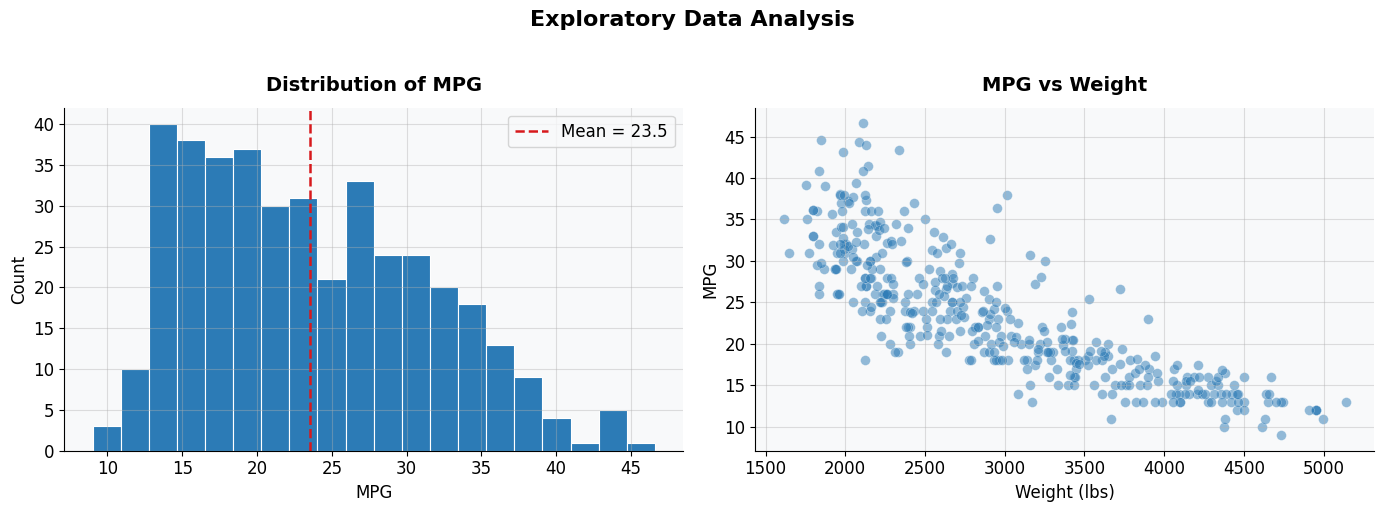

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution of MPG
axes[0].hist(df['mpg'], bins=20, color=MAIN_COLOR, edgecolor='white', linewidth=0.8)
axes[0].set_title('Distribution of MPG', fontsize=14, fontweight='bold', pad=12)
axes[0].set_xlabel('MPG', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].axvline(df['mpg'].mean(), color=SECOND_COLOR, linestyle='--', linewidth=1.8, label=f'Mean = {df["mpg"].mean():.1f}')
axes[0].legend()

# MPG vs Weight
axes[1].scatter(df['weight'], df['mpg'], alpha=0.5, color=MAIN_COLOR, edgecolors='white', linewidth=0.3, s=50)
axes[1].set_title('MPG vs Weight', fontsize=14, fontweight='bold', pad=12)
axes[1].set_xlabel('Weight (lbs)', fontsize=12)
axes[1].set_ylabel('MPG', fontsize=12)

plt.suptitle('Exploratory Data Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

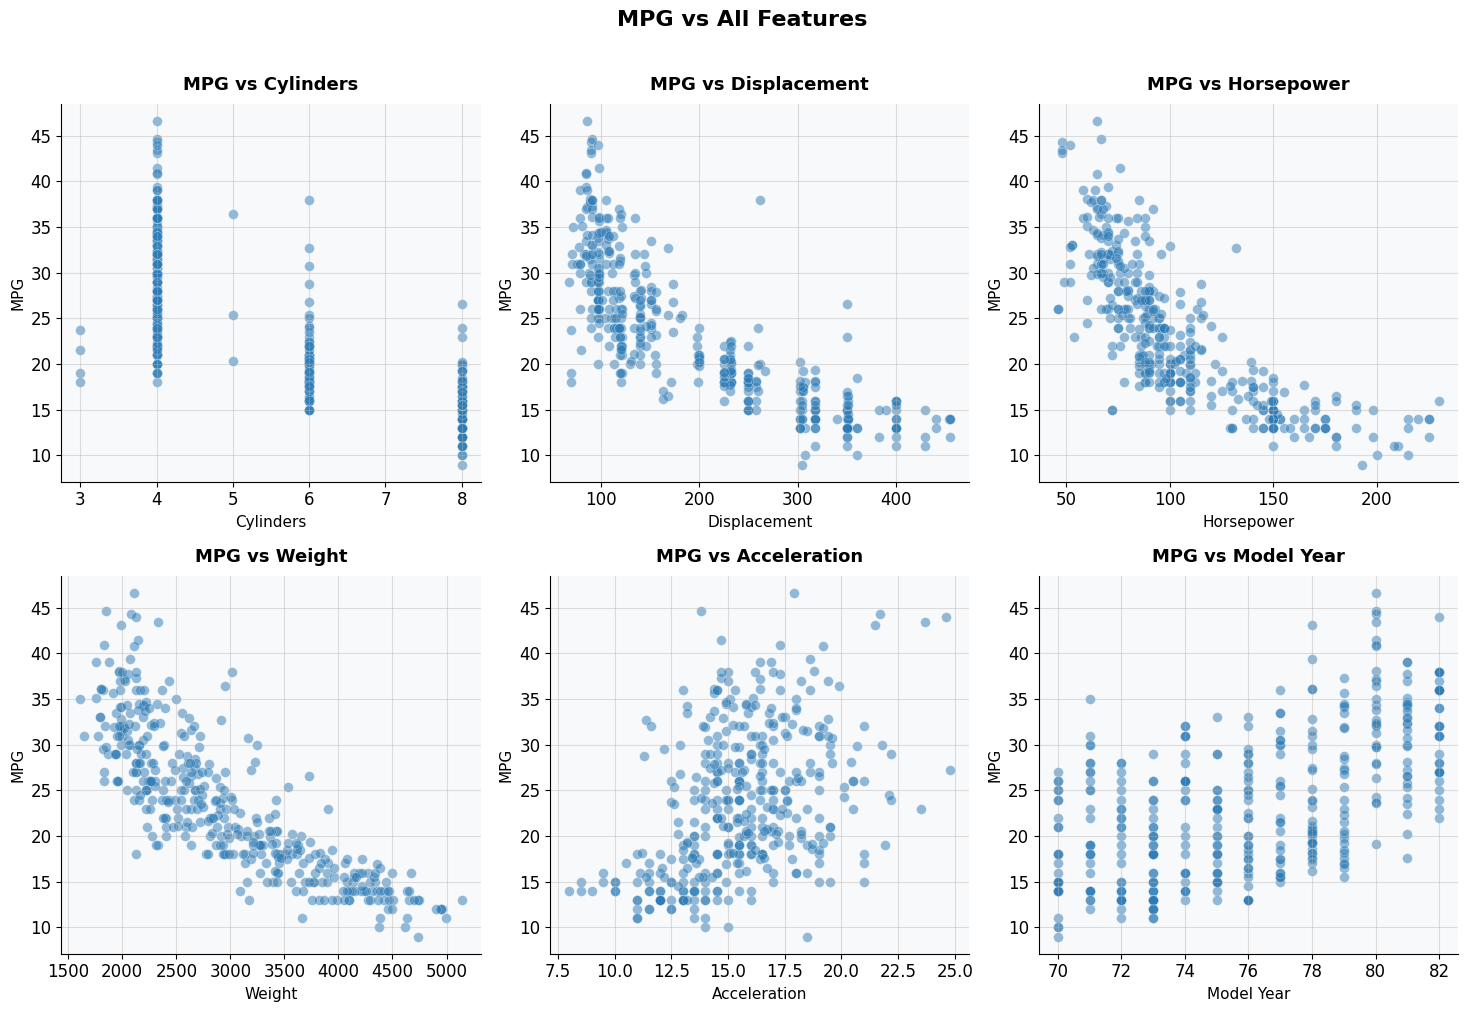

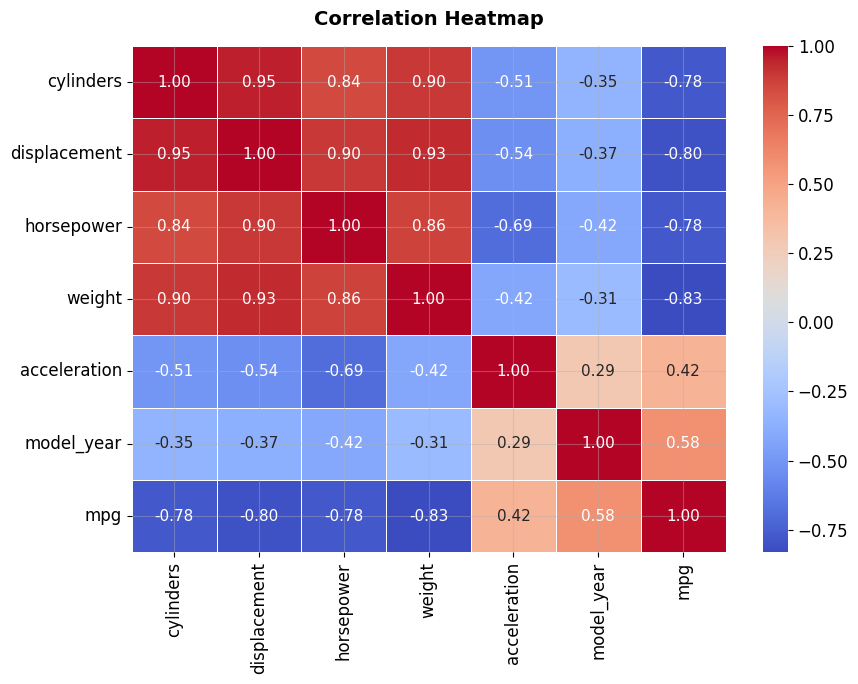

In [72]:
# MPG vs all features
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].scatter(df[feature], df['mpg'], alpha=0.5, color=MAIN_COLOR,
                    edgecolors='white', linewidth=0.3, s=50)
    axes[i].set_xlabel(feature.replace('_', ' ').title(), fontsize=11)
    axes[i].set_ylabel('MPG', fontsize=11)
    axes[i].set_title(f'MPG vs {feature.replace("_", " ").title()}',
                      fontsize=13, fontweight='bold', pad=10)

plt.suptitle('MPG vs All Features', fontsize=16, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(df[features + ['mpg']].corr(), annot=True, fmt='.2f',
            cmap='coolwarm', linewidths=0.5, linecolor='white',
            annot_kws={'size': 11})
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

## 1.3 Data Preprocessing
We handle missing values in the horsepower column by filling them with
the median. We then split the data into train (70%), validation (15%),
and test (15%) sets, and standardize all features using StandardScaler.

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Fill missing horsepower values with the median
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

# Define features and target
features = ['cylinders', 'displacement', 'horsepower', 'weight',
            'acceleration', 'model_year', 'origin']
X = df[features]
y = df['mpg']

# Split: 70% train, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Train size:", X_train.shape[0])
print("Validation size:", X_val.shape[0])
print("Test size:", X_test.shape[0])

Train size: 278
Validation size: 60
Test size: 60


## 1.4 Linear Regression Baseline
We train a simple linear regression model as our baseline. This model
assumes a linear relationship between the features and the target variable.

Linear Regression - Validation Metrics:
MSE:  8.929
RMSE: 2.988
MAE:  2.360
R2:   0.818


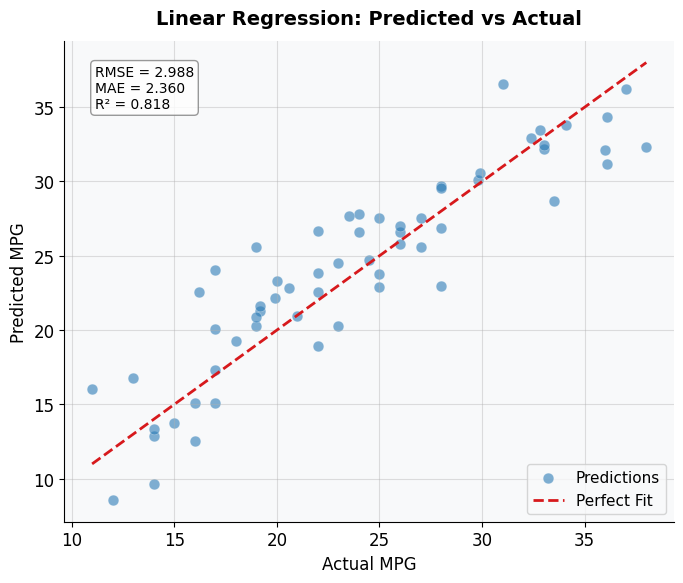

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict on validation set
y_val_pred = lr_model.predict(X_val_scaled)

# Calculate metrics
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print("Linear Regression - Validation Metrics:")
print(f"MSE:  {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE:  {mae:.3f}")
print(f"R2:   {r2:.3f}")

fig, ax = plt.subplots(figsize=(7, 6))
ax.scatter(y_val, y_val_pred, alpha=0.6, color=MAIN_COLOR,
           edgecolors='white', linewidth=0.3, s=60, label='Predictions')
ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()],
        color=SECOND_COLOR, linestyle='--', linewidth=2, label='Perfect Fit')
ax.set_xlabel('Actual MPG', fontsize=12)
ax.set_ylabel('Predicted MPG', fontsize=12)
ax.set_title('Linear Regression: Predicted vs Actual', fontsize=14, fontweight='bold', pad=12)
ax.legend(fontsize=11)
textstr = f'RMSE = {rmse:.3f}\nMAE = {mae:.3f}\nR² = {r2:.3f}'
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray'))
plt.tight_layout()
plt.show()

## 1.5 Polynomial Regression
We increase model complexity by adding polynomial features. We evaluate
degrees 1–5 to find the best trade-off between underfitting and overfitting.

Degree 1 | Train RMSE: 3.437 | Val RMSE: 2.988
Degree 2 | Train RMSE: 2.597 | Val RMSE: 2.850
Degree 3 | Train RMSE: 1.806 | Val RMSE: 3.660
Degree 4 | Train RMSE: 0.000 | Val RMSE: 80.168
Degree 5 | Train RMSE: 0.000 | Val RMSE: 19.921


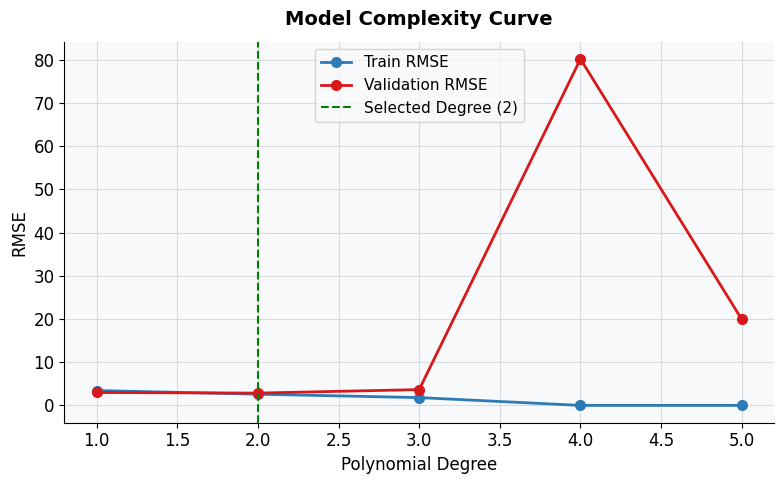

In [75]:
from sklearn.preprocessing import PolynomialFeatures

degrees = [1, 2, 3, 4, 5]
train_errors = []
val_errors = []

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_val_poly = poly.transform(X_val_scaled)

    # Train model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Calculate errors
    train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train_poly)))
    val_rmse = np.sqrt(mean_squared_error(y_val, model.predict(X_val_poly)))

    train_errors.append(train_rmse)
    val_errors.append(val_rmse)
    print(f"Degree {degree} | Train RMSE: {train_rmse:.3f} | Val RMSE: {val_rmse:.3f}")

# Plot complexity curve
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(degrees, train_errors, marker='o', color=MAIN_COLOR,
        linewidth=2, markersize=7, label='Train RMSE')
ax.plot(degrees, val_errors, marker='o', color=SECOND_COLOR,
        linewidth=2, markersize=7, label='Validation RMSE')

ax.set_xlabel('Polynomial Degree', fontsize=12)
ax.set_ylabel('RMSE', fontsize=12)
ax.set_title('Model Complexity Curve', fontsize=14, fontweight='bold', pad=12)
ax.axvline(x=2, color='green', linestyle='--', linewidth=1.5, label='Selected Degree (2)')
ax.legend(fontsize=11)

plt.tight_layout()
plt.show()

## 1.6 KNN Regression
We evaluate a non-parametric KNN regression model for K values from 1 to 20,
selecting the best K based on validation performance.

K= 1 | Train RMSE: 0.000 | Val RMSE: 3.474
K= 2 | Train RMSE: 1.753 | Val RMSE: 2.625
K= 3 | Train RMSE: 2.245 | Val RMSE: 2.664
K= 4 | Train RMSE: 2.434 | Val RMSE: 2.578
K= 5 | Train RMSE: 2.553 | Val RMSE: 2.665
K= 6 | Train RMSE: 2.618 | Val RMSE: 2.645
K= 7 | Train RMSE: 2.682 | Val RMSE: 2.590
K= 8 | Train RMSE: 2.783 | Val RMSE: 2.585
K= 9 | Train RMSE: 2.810 | Val RMSE: 2.620
K=10 | Train RMSE: 2.848 | Val RMSE: 2.617
K=11 | Train RMSE: 2.941 | Val RMSE: 2.612
K=12 | Train RMSE: 3.008 | Val RMSE: 2.691
K=13 | Train RMSE: 3.037 | Val RMSE: 2.662
K=14 | Train RMSE: 3.084 | Val RMSE: 2.678
K=15 | Train RMSE: 3.122 | Val RMSE: 2.666
K=16 | Train RMSE: 3.122 | Val RMSE: 2.700
K=17 | Train RMSE: 3.149 | Val RMSE: 2.709
K=18 | Train RMSE: 3.169 | Val RMSE: 2.749
K=19 | Train RMSE: 3.190 | Val RMSE: 2.739
K=20 | Train RMSE: 3.210 | Val RMSE: 2.727


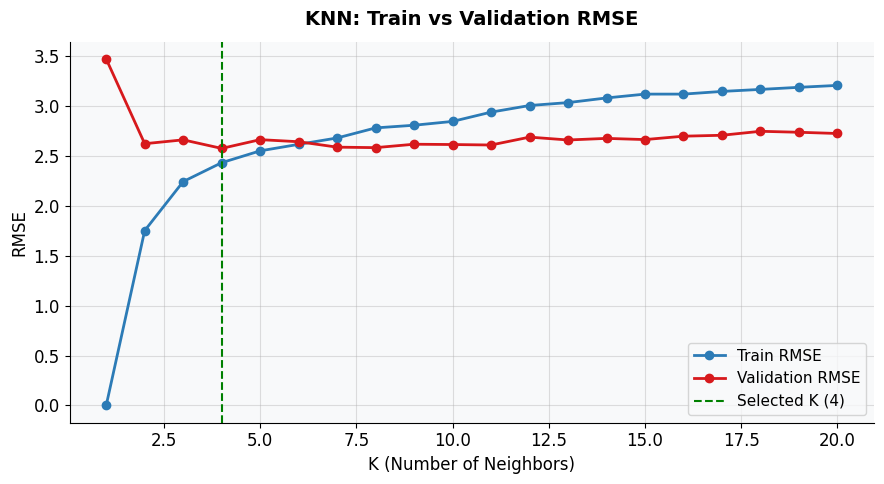

In [76]:
from sklearn.neighbors import KNeighborsRegressor

k_values = range(1, 21)
train_errors = []
val_errors = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    train_rmse = np.sqrt(mean_squared_error(y_train, knn.predict(X_train_scaled)))
    val_rmse = np.sqrt(mean_squared_error(y_val, knn.predict(X_val_scaled)))

    train_errors.append(train_rmse)
    val_errors.append(val_rmse)
    print(f"K={k:2d} | Train RMSE: {train_rmse:.3f} | Val RMSE: {val_rmse:.3f}")

# Plot
fig, ax = plt.subplots(figsize=(9, 5))

ax.plot(k_values, train_errors, marker='o', color=MAIN_COLOR,
        linewidth=2, markersize=6, label='Train RMSE')
ax.plot(k_values, val_errors, marker='o', color=SECOND_COLOR,
        linewidth=2, markersize=6, label='Validation RMSE')

ax.axvline(x=4, color='green', linestyle='--', linewidth=1.5, label='Selected K (4)')
ax.set_xlabel('K (Number of Neighbors)', fontsize=12)
ax.set_ylabel('RMSE', fontsize=12)
ax.set_title('KNN: Train vs Validation RMSE', fontsize=14, fontweight='bold', pad=12)
ax.legend(fontsize=11)

plt.tight_layout()
plt.show()

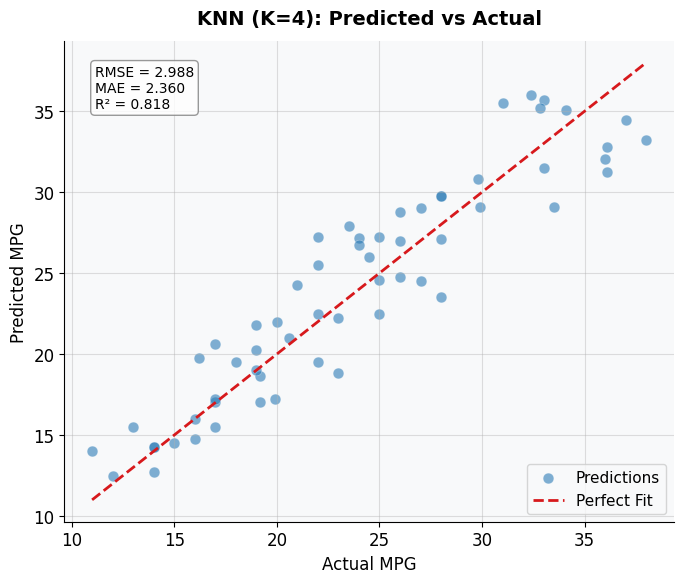

In [77]:
# Best KNN model with K=4
best_knn = KNeighborsRegressor(n_neighbors=4)
best_knn.fit(X_train_scaled, y_train)
y_val_pred_knn = best_knn.predict(X_val_scaled)

# Plot Predicted vs Actual
fig, ax = plt.subplots(figsize=(7, 6))

ax.scatter(y_val, y_val_pred_knn, alpha=0.6, color=MAIN_COLOR,
           edgecolors='white', linewidth=0.3, s=60, label='Predictions')
ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()],
        color=SECOND_COLOR, linestyle='--', linewidth=2, label='Perfect Fit')

ax.set_xlabel('Actual MPG', fontsize=12)
ax.set_ylabel('Predicted MPG', fontsize=12)
ax.set_title('KNN (K=4): Predicted vs Actual', fontsize=14, fontweight='bold', pad=12)
ax.legend(fontsize=11)

ttextstr = f'RMSE = {knn_rmse:.3f}\nMAE = {knn_mae:.3f}\nR² = {knn_r2:.3f}'
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray'))

plt.tight_layout()
plt.show()

## 1.7 Optimization Behavior
We compare Batch Gradient Descent and Stochastic Gradient Descent (SGD)
by tracking validation loss over 50 epochs.

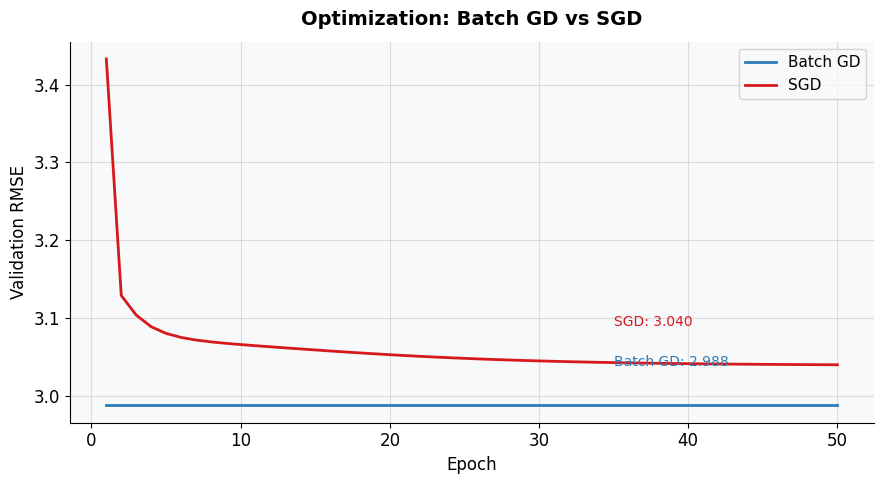

In [78]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import SGDRegressor

# Batch Gradient Descent (using LinearRegression as approximation)
batch_val_errors = []
sgd_val_errors = []
epochs = 50

# SGD - one pass at a time
sgd_model = SGDRegressor(max_iter=1, warm_start=True, random_state=42, eta0=0.01, learning_rate='constant')

batch_model = LinearRegression()

for epoch in range(1, epochs + 1):
    # Batch
    batch_model.fit(X_train_scaled, y_train)
    batch_val_errors.append(np.sqrt(mean_squared_error(y_val, batch_model.predict(X_val_scaled))))

    # SGD
    sgd_model.fit(X_train_scaled, y_train)
    sgd_val_errors.append(np.sqrt(mean_squared_error(y_val, sgd_model.predict(X_val_scaled))))

# Plot
fig, ax = plt.subplots(figsize=(9, 5))

ax.plot(range(1, epochs + 1), batch_val_errors,
        color=MAIN_COLOR, linewidth=2, label='Batch GD')
ax.plot(range(1, epochs + 1), sgd_val_errors,
        color=SECOND_COLOR, linewidth=2, label='SGD')

ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('Validation RMSE', fontsize=12)
ax.set_title('Optimization: Batch GD vs SGD', fontsize=14, fontweight='bold', pad=12)
ax.legend(fontsize=11)

# Add annotation for Batch GD final value
ax.annotate(f'Batch GD: {batch_val_errors[-1]:.3f}',
            xy=(50, batch_val_errors[-1]),
            xytext=(35, batch_val_errors[-1] + 0.05),
            fontsize=10, color=MAIN_COLOR)

# Add annotation for SGD final value
ax.annotate(f'SGD: {sgd_val_errors[-1]:.3f}',
            xy=(50, sgd_val_errors[-1]),
            xytext=(35, sgd_val_errors[-1] + 0.05),
            fontsize=10, color=SECOND_COLOR)

plt.tight_layout()
plt.show()

## 1.8 Model Comparison and Final Evaluation
We compare all three models on the validation set and evaluate the best
model (KNN, K=4) on the held-out test set exactly once.

In [79]:
# Final comparison on validation set
from sklearn.preprocessing import PolynomialFeatures

# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_val_rmse = np.sqrt(mean_squared_error(y_val, lr.predict(X_val_scaled)))
lr_val_r2 = r2_score(y_val, lr.predict(X_val_scaled))

# 2. Polynomial Regression (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)
pr = LinearRegression()
pr.fit(X_train_poly, y_train)
pr_val_rmse = np.sqrt(mean_squared_error(y_val, pr.predict(X_val_poly)))
pr_val_r2 = r2_score(y_val, pr.predict(X_val_poly))

# 3. KNN (K=4)
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train_scaled, y_train)
knn_val_rmse = np.sqrt(mean_squared_error(y_val, knn.predict(X_val_scaled)))
knn_val_r2 = r2_score(y_val, knn.predict(X_val_scaled))

# Print comparison
print("Model Comparison on Validation Set:")
print(f"{'Model':<25} {'RMSE':>8} {'R2':>8}")
print("-" * 45)
print(f"{'Linear Regression':<25} {lr_val_rmse:>8.3f} {lr_val_r2:>8.3f}")
print(f"{'Polynomial (degree=2)':<25} {pr_val_rmse:>8.3f} {pr_val_r2:>8.3f}")
print(f"{'KNN (K=4)':<25} {knn_val_rmse:>8.3f} {knn_val_r2:>8.3f}")

# Final evaluation on TEST set (only once!)
X_test_poly = poly.transform(X_test_scaled)
print("\n--- Final Model (KNN K=4) on TEST set ---")
knn_test_rmse = np.sqrt(mean_squared_error(y_test, knn.predict(X_test_scaled)))
knn_test_r2 = r2_score(y_test, knn.predict(X_test_scaled))
print(f"RMSE: {knn_test_rmse:.3f}")
print(f"R2:   {knn_test_r2:.3f}")

Model Comparison on Validation Set:
Model                         RMSE       R2
---------------------------------------------
Linear Regression            2.988    0.818
Polynomial (degree=2)        2.850    0.834
KNN (K=4)                    2.578    0.865

--- Final Model (KNN K=4) on TEST set ---
RMSE: 2.400
R2:   0.912


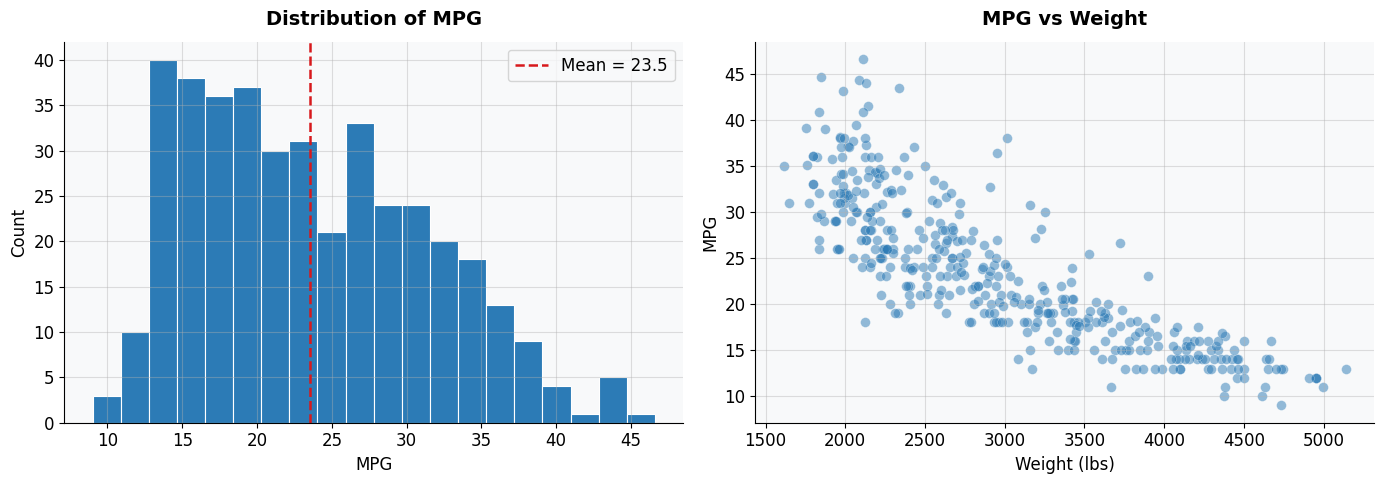

In [83]:
# Save all figures
import os
os.makedirs('figures', exist_ok=True)

# Figure 1 - MPG Distribution + MPG vs Weight
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(df['mpg'], bins=20, color=MAIN_COLOR, edgecolor='white', linewidth=0.8)
axes[0].set_title('Distribution of MPG', fontsize=14, fontweight='bold', pad=12)
axes[0].set_xlabel('MPG', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].axvline(df['mpg'].mean(), color=SECOND_COLOR, linestyle='--', linewidth=1.8, label=f'Mean = {df["mpg"].mean():.1f}')
axes[0].legend()
axes[1].scatter(df['weight'], df['mpg'], alpha=0.5, color=MAIN_COLOR, edgecolors='white', linewidth=0.3, s=50)
axes[1].set_title('MPG vs Weight', fontsize=14, fontweight='bold', pad=12)
axes[1].set_xlabel('Weight (lbs)', fontsize=12)
axes[1].set_ylabel('MPG', fontsize=12)
plt.tight_layout()
plt.savefig('figures/fig1_eda.png', dpi=150, bbox_inches='tight')
plt.show()



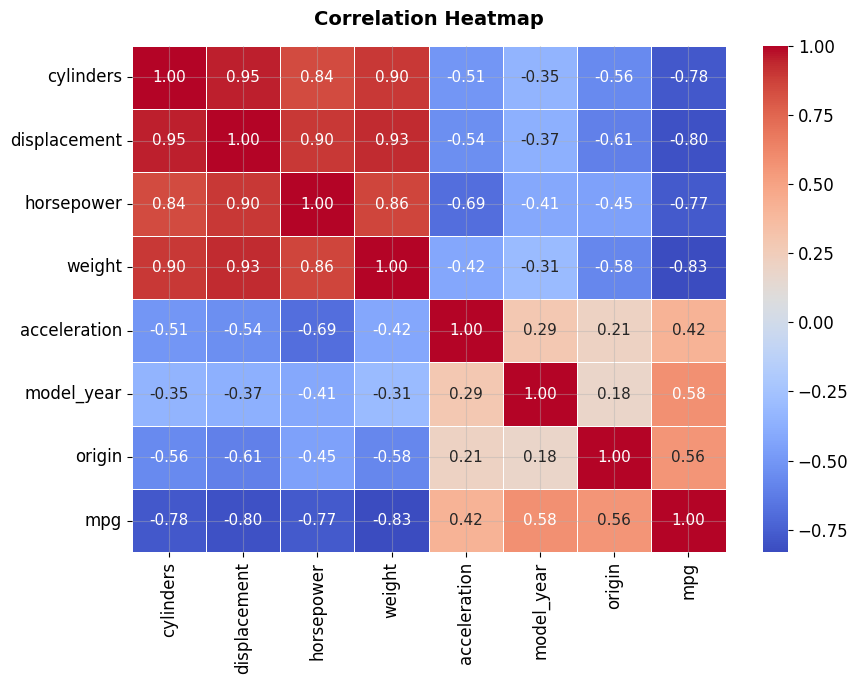

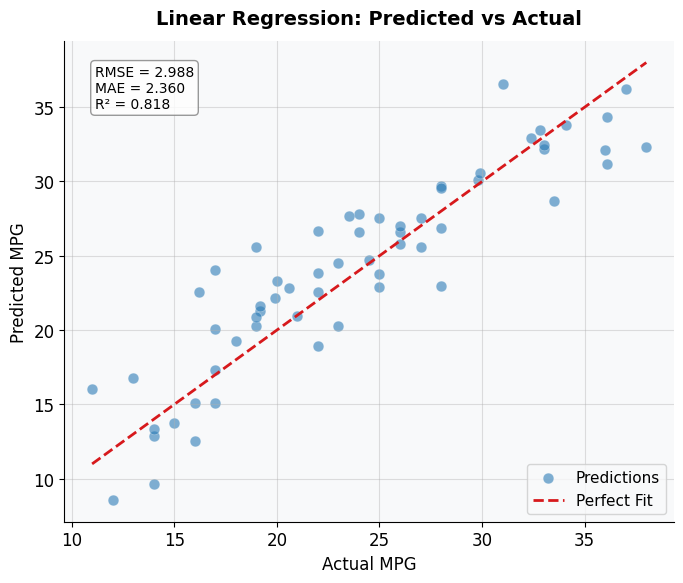

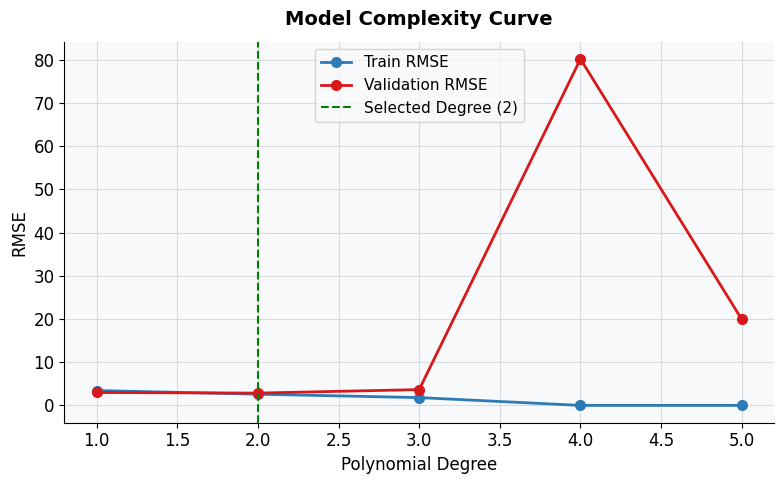

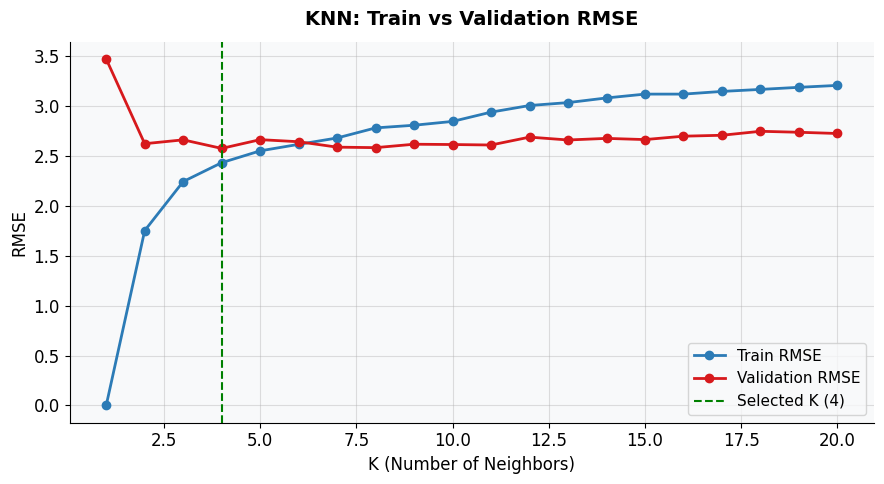

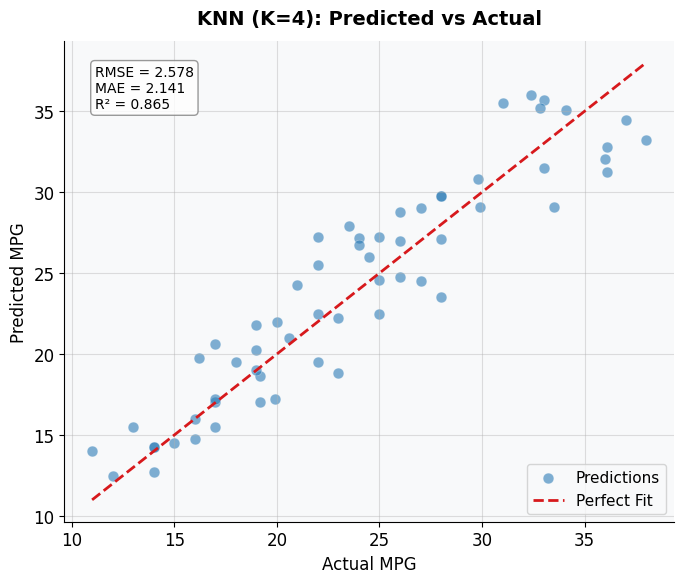

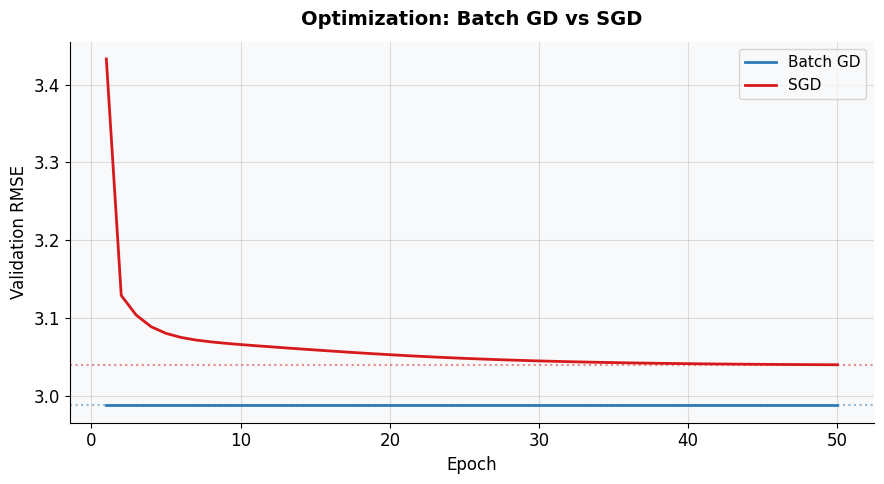

All figures saved successfully!


In [85]:
# Figure 2 - Correlation Heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(df[features + ['mpg']].corr(), annot=True, fmt='.2f',
            cmap='coolwarm', linewidths=0.5, linecolor='white',
            annot_kws={'size': 11})
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.savefig('figures/fig2_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

# Figure 3 - Linear Regression Predicted vs Actual
fig, ax = plt.subplots(figsize=(7, 6))
ax.scatter(y_val, y_val_pred, alpha=0.6, color=MAIN_COLOR,
           edgecolors='white', linewidth=0.3, s=60, label='Predictions')
ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()],
        color=SECOND_COLOR, linestyle='--', linewidth=2, label='Perfect Fit')
ax.set_xlabel('Actual MPG', fontsize=12)
ax.set_ylabel('Predicted MPG', fontsize=12)
ax.set_title('Linear Regression: Predicted vs Actual', fontsize=14, fontweight='bold', pad=12)
ax.legend(fontsize=11)
textstr = f'RMSE = {rmse:.3f}\nMAE = {mae:.3f}\nR² = {r2:.3f}'
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray'))
plt.tight_layout()
plt.savefig('figures/fig3_linear_pred.png', dpi=150, bbox_inches='tight')
plt.show()

# Figure 4 - Model Complexity Curve
# Recalculate polynomial errors
poly_degrees = [1, 2, 3, 4, 5]
poly_train_errors = []
poly_val_errors = []

for degree in poly_degrees:
    poly_temp = PolynomialFeatures(degree=degree)
    X_train_poly_temp = poly_temp.fit_transform(X_train_scaled)
    X_val_poly_temp = poly_temp.transform(X_val_scaled)
    model_temp = LinearRegression()
    model_temp.fit(X_train_poly_temp, y_train)
    poly_train_errors.append(np.sqrt(mean_squared_error(y_train, model_temp.predict(X_train_poly_temp))))
    poly_val_errors.append(np.sqrt(mean_squared_error(y_val, model_temp.predict(X_val_poly_temp))))

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(poly_degrees, poly_train_errors, marker='o', color=MAIN_COLOR,
        linewidth=2, markersize=7, label='Train RMSE')
ax.plot(poly_degrees, poly_val_errors, marker='o', color=SECOND_COLOR,
        linewidth=2, markersize=7, label='Validation RMSE')
ax.axvline(x=2, color='green', linestyle='--', linewidth=1.5, label='Selected Degree (2)')
ax.set_xlabel('Polynomial Degree', fontsize=12)
ax.set_ylabel('RMSE', fontsize=12)
ax.set_title('Model Complexity Curve', fontsize=14, fontweight='bold', pad=12)
ax.legend(fontsize=11)
plt.tight_layout()
plt.savefig('figures/fig4_poly_complexity.png', dpi=150, bbox_inches='tight')
plt.show()
# Figure 5 - KNN Train vs Validation RMSE
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(k_values, train_errors, marker='o', color=MAIN_COLOR,
        linewidth=2, markersize=6, label='Train RMSE')
ax.plot(k_values, val_errors, marker='o', color=SECOND_COLOR,
        linewidth=2, markersize=6, label='Validation RMSE')
ax.axvline(x=4, color='green', linestyle='--', linewidth=1.5, label='Selected K (4)')
ax.set_xlabel('K (Number of Neighbors)', fontsize=12)
ax.set_ylabel('RMSE', fontsize=12)
ax.set_title('KNN: Train vs Validation RMSE', fontsize=14, fontweight='bold', pad=12)
ax.legend(fontsize=11)
plt.tight_layout()
plt.savefig('figures/fig5_knn_k.png', dpi=150, bbox_inches='tight')
plt.show()

# Figure 6 - KNN Predicted vs Actual
fig, ax = plt.subplots(figsize=(7, 6))
ax.scatter(y_val, y_val_pred_knn, alpha=0.6, color=MAIN_COLOR,
           edgecolors='white', linewidth=0.3, s=60, label='Predictions')
ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()],
        color=SECOND_COLOR, linestyle='--', linewidth=2, label='Perfect Fit')
ax.set_xlabel('Actual MPG', fontsize=12)
ax.set_ylabel('Predicted MPG', fontsize=12)
ax.set_title('KNN (K=4): Predicted vs Actual', fontsize=14, fontweight='bold', pad=12)
ax.legend(fontsize=11)
textstr = f'RMSE = {knn_rmse:.3f}\nMAE = {knn_mae:.3f}\nR² = {knn_r2:.3f}'
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray'))
plt.tight_layout()
plt.savefig('figures/fig6_knn_pred.png', dpi=150, bbox_inches='tight')
plt.show()

# Figure 7 - Optimization
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(range(1, epochs + 1), batch_val_errors,
        color=MAIN_COLOR, linewidth=2, label='Batch GD')
ax.plot(range(1, epochs + 1), sgd_val_errors,
        color=SECOND_COLOR, linewidth=2, label='SGD')
ax.axhline(y=batch_val_errors[-1], color=MAIN_COLOR, linestyle=':', alpha=0.5)
ax.axhline(y=sgd_val_errors[-1], color=SECOND_COLOR, linestyle=':', alpha=0.5)
ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('Validation RMSE', fontsize=12)
ax.set_title('Optimization: Batch GD vs SGD', fontsize=14, fontweight='bold', pad=12)
ax.legend(fontsize=11)
plt.tight_layout()
plt.savefig('figures/fig7_optimization.png', dpi=150, bbox_inches='tight')
plt.show()

print("All figures saved successfully!")

In [86]:
import shutil
shutil.make_archive('figures', 'zip', 'figures')
print("figures.zip created!")


figures.zip created!
